In [18]:
# import d3rlpy
from d3rlpy.datasets import get_d4rl
import gym
import matplotlib.pyplot as plt
import numpy as np
import os
os.environ['D4RL_SUPPRESS_IMPORT_ERROR'] = '1'

In [19]:
# tasks = ["hopper-medium-v2", "walker2d-medium-v2", "halfcheetah-medium-v2", "ant-medium-v2",
#          "hopper-medium-expert-v2", "walker2d-medium-expert-v2", "halfcheetah-medium-expert-v2", "ant-medium-expert-v2",
#          "hopper-medium-replay-v2", "walker2d-medium-replay-v2", "halfcheetah-medium-replay-v2", "ant-medium-replay-v2"]

task = "ant-medium-expert-v2"


In [20]:
def plot_hist(data, fig, axs, i, j, m):
    axs[i, j].hist(data, bins=50)  # Adjust the number of bins as needed

    # Set labels and title
    axs[i, j].set_xlabel('Value', fontsize=10)
    axs[i, j].set_ylabel('Frequency', fontsize=10)
    axs[i, j].set_title(f'{tasks[m*i+j]}', fontsize=7)

    axs[i, j].set_xticks(np.linspace(data.min(), data.max(), num=20))
    axs[i, j].tick_params(axis='x', rotation=50, labelsize=6)

In [21]:
l = []
store = []
dataset, env = get_d4rl(task)

returns = []
for episode in dataset.episodes:
    r = 0
    for transition in episode:
        r += transition.reward
    returns.append(r)
normalized_score = env.get_normalized_score(np.array(returns)) 
l.append(normalized_score)

load datafile: 100%|██████████| 9/9 [07:12<00:00, 48.09s/it] 


: 

: 

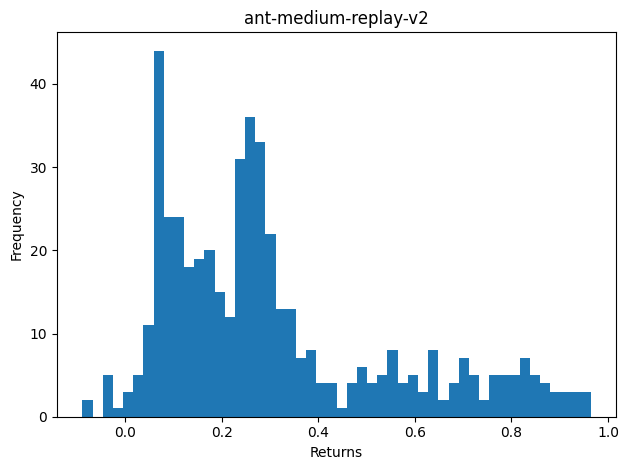

In [ ]:
n = 1
m = 1
plt.hist(l, bins=50)  # Adjust the number of bins as needed
plt.title(f'{task}')
plt.xlabel('Returns')
plt.ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()
plt.savefig(f'../data_distribution/{task}.png')
# Show the plot
plt.show()

In [11]:
env = gym.make('halfcheetah-medium-v2')
env.reset()
env.step(env.action_space.sample())


(array([-0.04705115, -0.11863414, -0.17765532,  0.43191629,  0.14869734,
        -0.07399756, -0.49689009,  0.14126169, -0.06776159, -1.36704548,
        -0.54121799, -0.83147298,  7.00335439, -3.25642884,  0.67236768,
        -4.68528869,  4.18594812]),
 -0.34613358979276176,
 False,
 {'reward_run': -0.14159729485562794, 'reward_ctrl': -0.2045362949371338})

In [ ]:
dataset = env.get_dataset()

In [15]:
dataset['observations'][0]

array([ 0.01983191, -0.08950131, -0.00319691, -0.03601582,  0.06619842,
       -0.09322933,  0.06039053, -0.08753889, -0.01877608, -0.16759904,
       -0.07047922,  0.07015167,  0.0302026 ,  0.05502646,  0.11365079,
        0.06842492, -0.13811582], dtype=float32)

In [ ]:
N = 1
COUNT = 2
mean_results = []

for i in range(N):
    d3rlpy.seed(i)
    env.seed(i)
    online_env.seed(i)
    iql = d3rlpy.algos.IQL(use_gpu=True)

    terminate = False
    prev_score = -np.inf
    counter = 0
    while(not terminate):   
        iql.fit(dataset, n_steps=10e6, save_interval=100, save_metrics=False)
        scorer = evaluate_on_environment(online_env, n_trials=100)
        score = scorer(iql)
        print(score)
        if abs(score - prev_score) < 1000:
            counter += 1
            if counter == 1: #set prev score only when counter is 1 (beginning of counting)
                prev_score = score
        else:
            counter = 0
            prev_score = score #reassign prev score as counter is reset
        if counter == COUNT:
            terminate = True

    # iql.save_model("./saved_models/iql_{}_{}.pt".format(algo, i))
    scorer = evaluate_on_environment(online_env, n_trials=100)
    mean_results.append(scorer(iql))
    
with open('results.txt', 'a') as f:
    f.write(f"{algo}\n")
    for result in mean_results:
        f.write(f"{result}\n")

2023-04-20 18:04:14 [debug    ] RoundIterator is selected.
2023-04-20 18:04:14 [debug    ] Building models...
2023-04-20 18:04:14 [debug    ] Models have been built.
2023-04-20 18:04:14 [info     ] Parameters                     params={'action_scaler': None, 'actor_encoder_factory': {'type': 'default', 'params': {'activation': 'relu', 'use_batch_norm': False, 'dropout_rate': None}}, 'actor_learning_rate': 0.0003, 'actor_optim_factory': {'optim_cls': 'Adam', 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}, 'batch_size': 256, 'critic_encoder_factory': {'type': 'default', 'params': {'activation': 'relu', 'use_batch_norm': False, 'dropout_rate': None}}, 'critic_learning_rate': 0.0003, 'critic_optim_factory': {'optim_cls': 'Adam', 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}, 'expectile': 0.7, 'gamma': 0.99, 'generated_maxlen': 100000, 'max_weight': 100.0, 'n_critics': 2, 'n_frames': 1, 'n_steps': 1, 'real_ratio': 1.0, 'reward_scaler':

Epoch 1/1: 100%|██████████| 3902/3902 [01:32<00:00, 42.19it/s, critic_loss=4.88, value_loss=0.174, actor_loss=3.58] 

2023-04-20 18:05:47 [info     ] IQL_20230420180414: epoch=1 step=3902 epoch=1 metrics={'time_sample_batch': 0.00084804517070432, 'time_algorithm_update': 0.022207287688673246, 'critic_loss': 4.880179274615296, 'value_loss': 0.17397391806124612, 'actor_loss': 3.5777103462653175, 'time_step': 0.02343858302647734} step=3902


221.2615735798105
2023-04-20 18:13:07 [debug    ] RoundIterator is selected.
2023-04-20 18:13:07 [warning  ] Skip building models since they're already built.
2023-04-20 18:13:07 [info     ] Parameters                     params={'action_scaler': None, 'actor_encoder_factory': {'type': 'default', 'params': {'activation': 'relu', 'use_batch_norm': False, 'dropout_rate': None}}, 'actor_learning_rate': 0.0003, 'actor_optim_factory': {'optim_cls': 'Adam', 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}, 'batch_size': 256, 'critic_encoder_factory': {'type': 'default', 'params': {'activation': 'relu', 'use_batch_norm': False, 'dropout_rate': None}}, 'critic_learning_rate': 0.0003, 'critic_optim_factory': {'optim_cls': 'Adam', 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}, 'expectile': 0.7, 'gamma': 0.99, 'generated_maxlen': 100000, 'max_weight': 100.0, 'n_critics': 2, 'n_frames': 1, 'n_steps': 1, 'real_ratio': 1.0, 'reward_scaler': None, 

Epoch 1/1: 100%|██████████| 3902/3902 [01:52<00:00, 34.77it/s, critic_loss=21.8, value_loss=1.52, actor_loss=-5.83] 

2023-04-20 18:14:59 [info     ] IQL_20230420181307: epoch=1 step=3902 epoch=1 metrics={'time_sample_batch': 0.0009186825710709189, 'time_algorithm_update': 0.027132907810729325, 'critic_loss': 21.813480493901388, 'value_loss': 1.518800905534758, 'actor_loss': -5.837470448235559, 'time_step': 0.028449849065666256} step=3902


363.90642638232316
2023-04-20 18:21:20 [debug    ] RoundIterator is selected.
2023-04-20 18:21:20 [warning  ] Skip building models since they're already built.
2023-04-20 18:21:20 [info     ] Parameters                     params={'action_scaler': None, 'actor_encoder_factory': {'type': 'default', 'params': {'activation': 'relu', 'use_batch_norm': False, 'dropout_rate': None}}, 'actor_learning_rate': 0.0003, 'actor_optim_factory': {'optim_cls': 'Adam', 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}, 'batch_size': 256, 'critic_encoder_factory': {'type': 'default', 'params': {'activation': 'relu', 'use_batch_norm': False, 'dropout_rate': None}}, 'critic_learning_rate': 0.0003, 'critic_optim_factory': {'optim_cls': 'Adam', 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}, 'expectile': 0.7, 'gamma': 0.99, 'generated_maxlen': 100000, 'max_weight': 100.0, 'n_critics': 2, 'n_frames': 1, 'n_steps': 1, 'real_ratio': 1.0, 'reward_scaler': None,

Epoch 1/1: 100%|██████████| 3902/3902 [01:31<00:00, 42.51it/s, critic_loss=41.1, value_loss=3.78, actor_loss=-26]  

2023-04-20 18:22:52 [info     ] IQL_20230420182120: epoch=1 step=3902 epoch=1 metrics={'time_sample_batch': 0.0008911846968407878, 'time_algorithm_update': 0.021948979183198977, 'critic_loss': 41.07449303279468, 'value_loss': 3.7797223616416242, 'actor_loss': -25.991480433531507, 'time_step': 0.02325804694257352} step=3902


2809.911006986881
2023-04-20 18:29:08 [debug    ] RoundIterator is selected.
2023-04-20 18:29:08 [warning  ] Skip building models since they're already built.
2023-04-20 18:29:08 [info     ] Parameters                     params={'action_scaler': None, 'actor_encoder_factory': {'type': 'default', 'params': {'activation': 'relu', 'use_batch_norm': False, 'dropout_rate': None}}, 'actor_learning_rate': 0.0003, 'actor_optim_factory': {'optim_cls': 'Adam', 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}, 'batch_size': 256, 'critic_encoder_factory': {'type': 'default', 'params': {'activation': 'relu', 'use_batch_norm': False, 'dropout_rate': None}}, 'critic_learning_rate': 0.0003, 'critic_optim_factory': {'optim_cls': 'Adam', 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}, 'expectile': 0.7, 'gamma': 0.99, 'generated_maxlen': 100000, 'max_weight': 100.0, 'n_critics': 2, 'n_frames': 1, 'n_steps': 1, 'real_ratio': 1.0, 'reward_scaler': None, 

Epoch 1/1: 100%|██████████| 3902/3902 [02:15<00:00, 28.88it/s, critic_loss=56.6, value_loss=5.99, actor_loss=-39.2]

2023-04-20 18:31:23 [info     ] IQL_20230420182908: epoch=1 step=3902 epoch=1 metrics={'time_sample_batch': 0.0010413302329184153, 'time_algorithm_update': 0.03269592466750309, 'critic_loss': 56.61422247913542, 'value_loss': 5.99190851396808, 'actor_loss': -39.1983261878279, 'time_step': 0.034205952587645826} step=3902


3462.5612464541214
2023-04-20 18:37:38 [debug    ] RoundIterator is selected.
2023-04-20 18:37:38 [warning  ] Skip building models since they're already built.
2023-04-20 18:37:38 [info     ] Parameters                     params={'action_scaler': None, 'actor_encoder_factory': {'type': 'default', 'params': {'activation': 'relu', 'use_batch_norm': False, 'dropout_rate': None}}, 'actor_learning_rate': 0.0003, 'actor_optim_factory': {'optim_cls': 'Adam', 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}, 'batch_size': 256, 'critic_encoder_factory': {'type': 'default', 'params': {'activation': 'relu', 'use_batch_norm': False, 'dropout_rate': None}}, 'critic_learning_rate': 0.0003, 'critic_optim_factory': {'optim_cls': 'Adam', 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}, 'expectile': 0.7, 'gamma': 0.99, 'generated_maxlen': 100000, 'max_weight': 100.0, 'n_critics': 2, 'n_frames': 1, 'n_steps': 1, 'real_ratio': 1.0, 'reward_scaler': None,

Epoch 1/1: 100%|██████████| 3902/3902 [01:17<00:00, 50.67it/s, critic_loss=66.2, value_loss=7.45, actor_loss=-45.8]


2023-04-20 18:38:55 [info     ] IQL_20230420183738: epoch=1 step=3902 epoch=1 metrics={'time_sample_batch': 0.0007978060623122019, 'time_algorithm_update': 0.018389491714739543, 'critic_loss': 66.23306202363015, 'value_loss': 7.445276265814022, 'actor_loss': -45.84274819378728, 'time_step': 0.01952893815854462} step=3902
4469.205496312171
2023-04-20 18:44:57 [debug    ] RoundIterator is selected.
2023-04-20 18:44:57 [warning  ] Skip building models since they're already built.
2023-04-20 18:44:57 [info     ] Parameters                     params={'action_scaler': None, 'actor_encoder_factory': {'type': 'default', 'params': {'activation': 'relu', 'use_batch_norm': False, 'dropout_rate': None}}, 'actor_learning_rate': 0.0003, 'actor_optim_factory': {'optim_cls': 'Adam', 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}, 'batch_size': 256, 'critic_encoder_factory': {'type': 'default', 'params': {'activation': 'relu', 'use_batch_norm': False, 'dropout_rate': None}},

Epoch 1/1: 100%|██████████| 3902/3902 [01:23<00:00, 46.73it/s, critic_loss=71.2, value_loss=8.08, actor_loss=-49.7]

2023-04-20 18:46:21 [info     ] IQL_20230420184457: epoch=1 step=3902 epoch=1 metrics={'time_sample_batch': 0.0011268067152178758, 'time_algorithm_update': 0.01969808893042427, 'critic_loss': 71.23574936640439, 'value_loss': 8.077477444018662, 'actor_loss': -49.68228999117837, 'time_step': 0.021176685375289876} step=3902


4473.516040615767
2023-04-20 18:51:54 [debug    ] RoundIterator is selected.
2023-04-20 18:51:54 [warning  ] Skip building models since they're already built.
2023-04-20 18:51:54 [info     ] Parameters                     params={'action_scaler': None, 'actor_encoder_factory': {'type': 'default', 'params': {'activation': 'relu', 'use_batch_norm': False, 'dropout_rate': None}}, 'actor_learning_rate': 0.0003, 'actor_optim_factory': {'optim_cls': 'Adam', 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}, 'batch_size': 256, 'critic_encoder_factory': {'type': 'default', 'params': {'activation': 'relu', 'use_batch_norm': False, 'dropout_rate': None}}, 'critic_learning_rate': 0.0003, 'critic_optim_factory': {'optim_cls': 'Adam', 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}, 'expectile': 0.7, 'gamma': 0.99, 'generated_maxlen': 100000, 'max_weight': 100.0, 'n_critics': 2, 'n_frames': 1, 'n_steps': 1, 'real_ratio': 1.0, 'reward_scaler': None, 

Epoch 1/1: 100%|██████████| 3902/3902 [02:10<00:00, 29.90it/s, critic_loss=71.7, value_loss=7.92, actor_loss=-51.7]

2023-04-20 18:54:04 [info     ] IQL_20230420185154: epoch=1 step=3902 epoch=1 metrics={'time_sample_batch': 0.004975493048350668, 'time_algorithm_update': 0.02760934182034585, 'critic_loss': 71.66122921621536, 'value_loss': 7.916357212834087, 'actor_loss': -51.698834112336975, 'time_step': 0.03306037031767125} step=3902


4063.477287497267


In [24]:
for i in range(2):
    with open('results.txt', 'a') as f:
        f.write(f"{algo}\n")
        for result in mean_results:
            f.write(f"{i}\n")
            f.write("32")

In [27]:
f = open("results.txt", "a")

In [28]:
f.write("3")

1